# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Uncomment if trouble running too many requests:
    #time.sleep(2)     

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto carreno
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | akdagmadeni
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | chisinau
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | selje
Processing Record 8 of Set 1 | oriximina
Processing Record 9 of Set 1 | saleaula
City not found. Skipping...
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | bagdarin
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | warrington
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | pevek
Processing Record 23 of Set 1

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Show Record Count
city_data_df.count()


City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [27]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto carreno,6.1890,-67.4859,29.99,66,40,4.12,CO,1669748051
1,vaini,-21.2000,-175.2000,25.09,78,20,5.14,TO,1669748052
2,akdagmadeni,39.6603,35.8836,6.43,78,100,2.19,TR,1669748053
3,dikson,73.5069,80.5464,-10.23,95,100,2.74,RU,1669748053
4,chisinau,47.0056,28.8575,3.24,99,100,3.60,MD,1669748054


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto carreno,6.1890,-67.4859,29.99,66,40,4.12,CO,1669748051
1,vaini,-21.2000,-175.2000,25.09,78,20,5.14,TO,1669748052
2,akdagmadeni,39.6603,35.8836,6.43,78,100,2.19,TR,1669748053
3,dikson,73.5069,80.5464,-10.23,95,100,2.74,RU,1669748053
4,chisinau,47.0056,28.8575,3.24,99,100,3.60,MD,1669748054


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

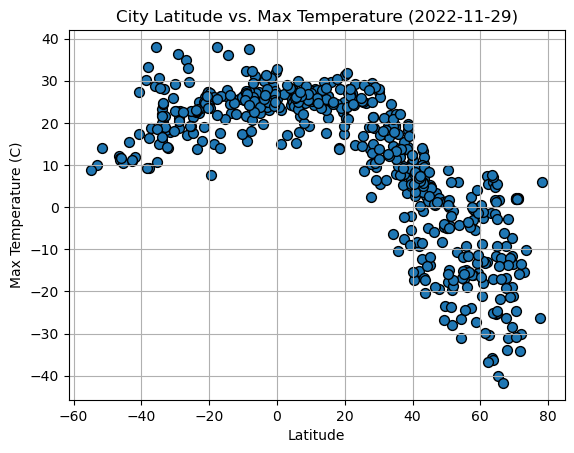

In [51]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', title="City Latitude vs. Max Temperature (2022-11-29)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

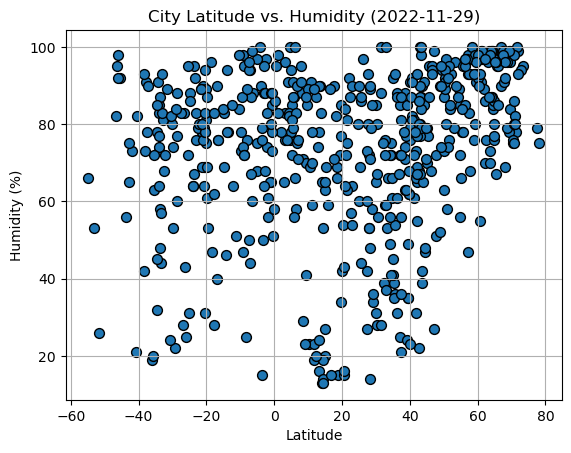

In [52]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', title="City Latitude vs. Humidity (2022-11-29)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

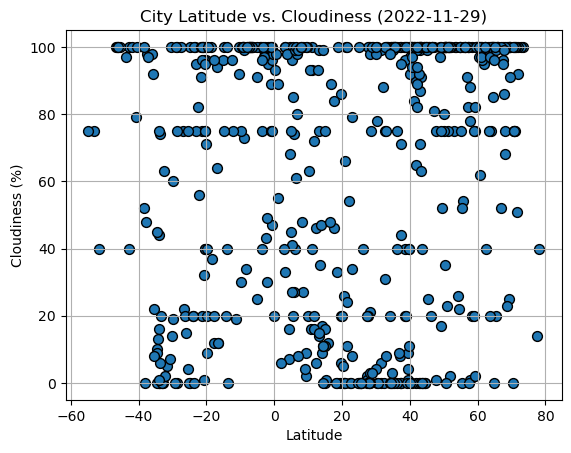

In [53]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', title="City Latitude vs. Cloudiness (2022-11-29)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

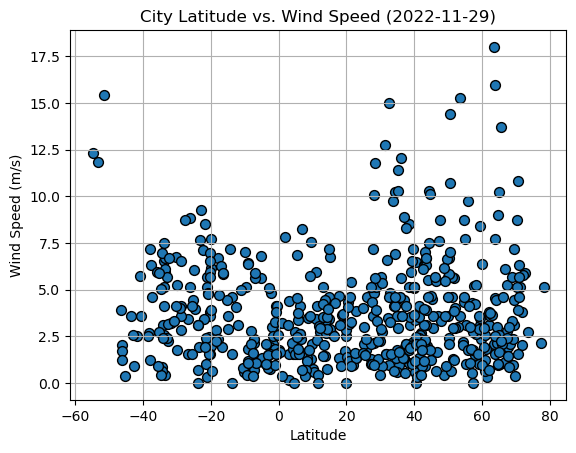

In [54]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', title="City Latitude vs. Wind Speed (2022-11-29)", grid=True, edgecolor='black', s=50)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [266]:
# Define a function to create Linear Regression plots
def create_graph(df:pd.DataFrame, weather:str, xpos:int, ypos:int)->None:

    # Create base scatter plot
    df.plot.scatter(x='Lat', y=weather, s=30)
 
    # Calculate linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(df['Lat'], df[weather])
    regress = df['Lat'] * slope + intercept
    eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Plot linear regression line and equation
    plt.plot(df['Lat'], regress, color='red')
    plt.annotate(eq, (xpos, ypos), fontsize=15, color='red')

    # Add other graph properties
    plt.title(f"The r-value is: {rvalue}", loc='left')
    plt.xlabel('Latitude')

    # Display results
    plt.show()


In [267]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto carreno,6.1890,-67.4859,29.99,66,40,4.12,CO,1669748051
2,akdagmadeni,39.6603,35.8836,6.43,78,100,2.19,TR,1669748053
3,dikson,73.5069,80.5464,-10.23,95,100,2.74,RU,1669748053
4,chisinau,47.0056,28.8575,3.24,99,100,3.60,MD,1669748054
6,selje,62.0459,5.3510,7.43,70,100,3.08,NO,1669748056


In [268]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vaini,-21.2000,-175.2000,25.09,78,20,5.14,TO,1669748052
5,punta arenas,-53.1500,-70.9167,10.06,53,75,11.83,CL,1669747972
7,oriximina,-1.7656,-55.8661,29.56,61,95,2.11,BR,1669748056
8,touros,-5.1989,-35.4608,27.31,68,91,5.60,BR,1669748057
12,rikitea,-23.1203,-134.9692,22.40,76,95,7.67,PF,1669748059


###  Temperature vs. Latitude Linear Regression Plot

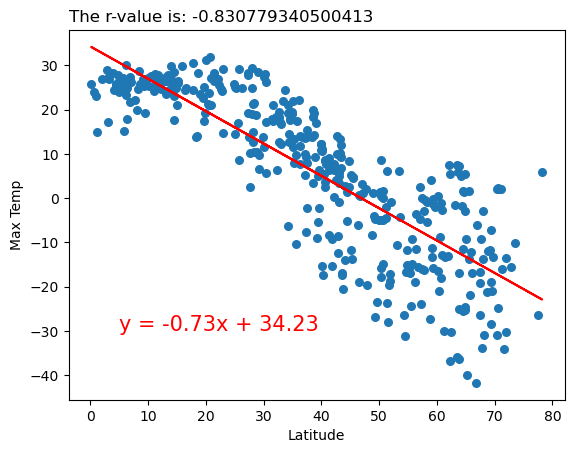

In [269]:
# Linear regression on Northern Hemisphere
create_graph(northern_hemi_df, 'Max Temp', 5, -30)


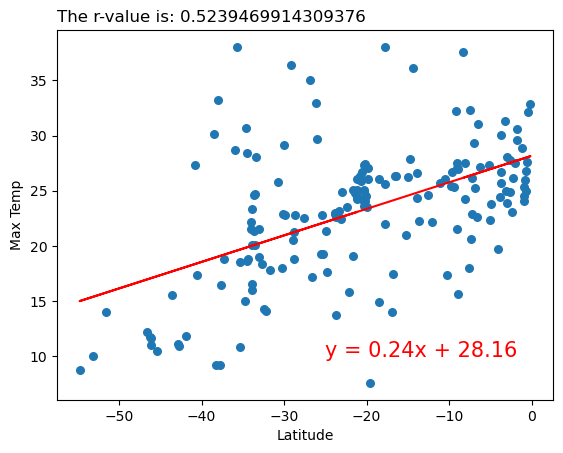

In [277]:
# Linear regression on Southern Hemisphere
create_graph(southern_hemi_df, 'Max Temp', -25, 10)


**Discussion about the linear relationship:**
The above graphs show each city's Maximum Temperature plotted according to the city's latitude.  The first begins at the equator and approaches the North Pole, and the second begins toward the South Pole and reaches the equator at the far right.  Our data does not extend to the Poles, as it focuses primarily on the most habitible areas of the globe, since we are mostly interested in vacation destinations.  

What we see from these plots is that there appears to be a fairly strong relationship between Latitude and Max Temperature, paritularly noticable on the plot of the Northern Hemisphere which shows an r-value of -0.83, suggesting a strong negative correlation.  This tells us that the further you move north from the equator, the colder the temperatures get, which is intuitively what we would expect to find.  Likewise, in our Southern Hemisphere graph, we see that the closer you move toward the equator, the higher the max temperature becomes, on average.  With a 0.52 r-value, there is still a moderate positive correlation here as well.


### Humidity vs. Latitude Linear Regression Plot

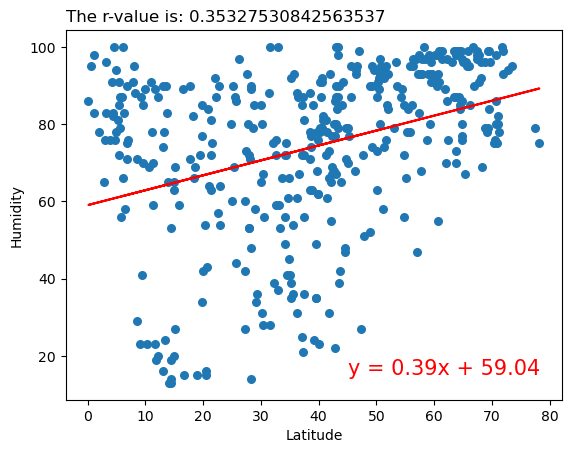

In [271]:
# Northern Hemisphere
create_graph(northern_hemi_df, 'Humidity', 45, 15)


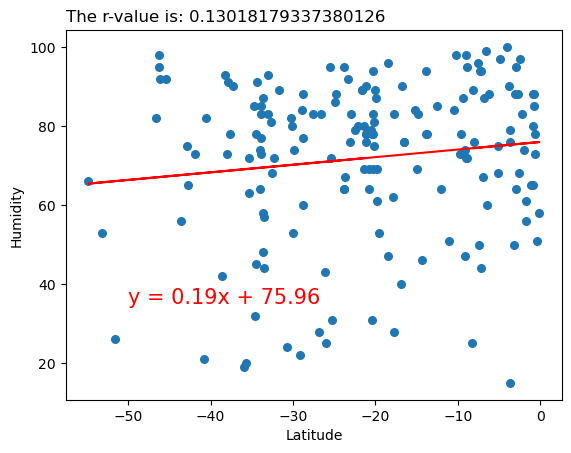

In [272]:
# Southern Hemisphere
create_graph(southern_hemi_df, 'Humidity', -50, 35)


**Discussion about the linear relationship:** The above graphs show us our cities again grouped according to Latitude and this time plotted by Humidity, the first graph showing the Northern Hemisphere and the second showing the Southern Hemisphere.  

Here we see less of a relationship between these two factors.  There is possibly a weak positive correlation between Latitude and Humidity in the Northern Hemisphere with an r-value of 0.35, but nearly no relationship at all in the Southern Hemisphere data with an r-value of 0.13.  This relationship could be explained by other factors as well, such as landmass shape or proximity to water, etc.  You can see from the scatter plot that the points are distributed quite widely across the range of the graph with minimal discernible pattern.

### Cloudiness vs. Latitude Linear Regression Plot

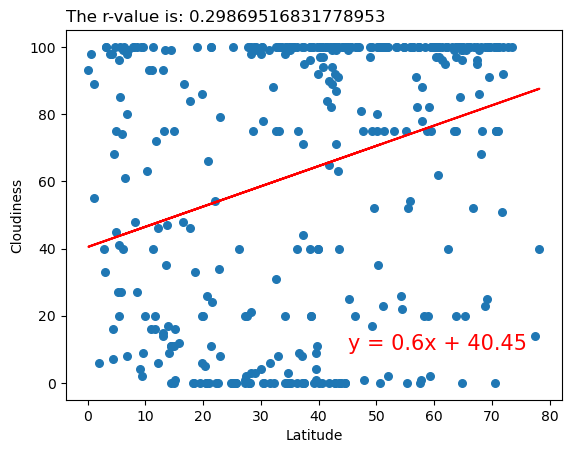

In [273]:
# Northern Hemisphere
create_graph(northern_hemi_df, 'Cloudiness', 45, 10)


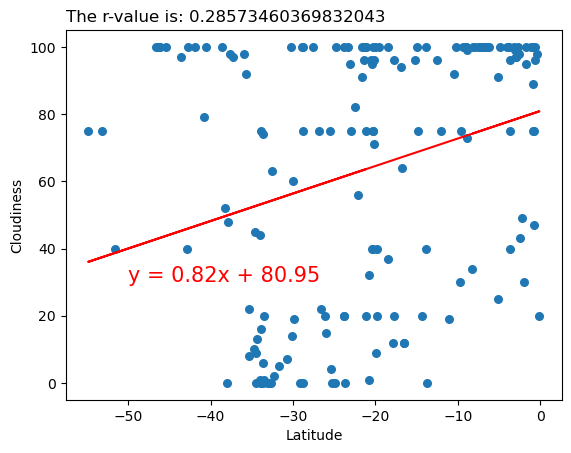

In [274]:
# Southern Hemisphere
create_graph(southern_hemi_df, 'Cloudiness', -50, 30)


**Discussion about the linear relationship:** Our next set of plots shows us our cities' relationships between Latitude and Cloudiness.  This, too, seems to be a weak correlation, with points spread widely across both graphs.  Though they seem to have a tendency to collect at the extremes of 0% and 100%, the overall pattern of the cities is still fairly random.  The r-value for each graph is around 0.29, which is a fairly weak relationship.  This again may be caused by other factors rather than latitude alone.

One interesting factor may be that, while it is a weak relationship, both Northern and Southern Hemisphere graphs show a positive correlation.  This suggests that, rather than a relationship to the equator, this would show a relationship to the north/south direction in general, if any relationship exists at all.

### Wind Speed vs. Latitude Linear Regression Plot

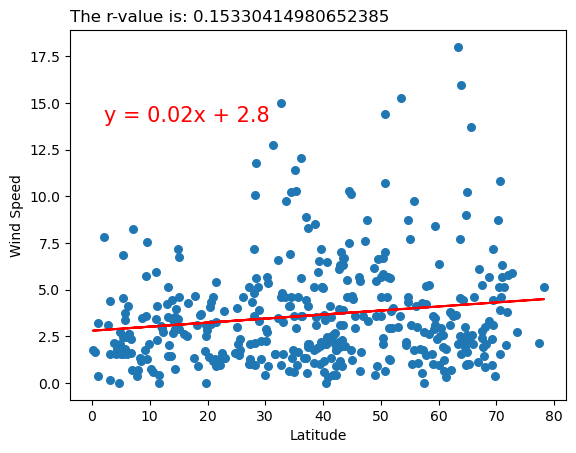

In [275]:
# Northern Hemisphere
create_graph(northern_hemi_df, 'Wind Speed', 2, 14)


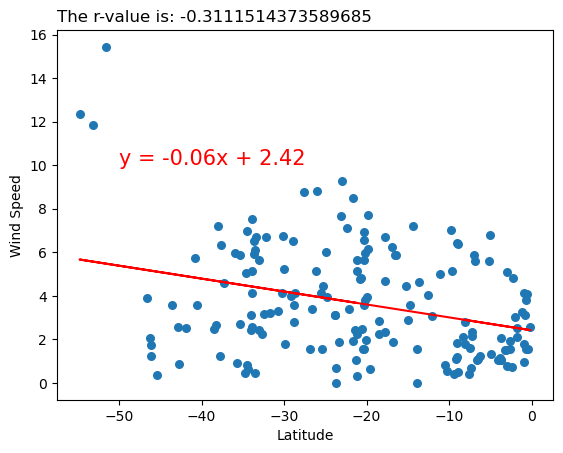

In [276]:
# Southern Hemisphere
create_graph(southern_hemi_df, 'Wind Speed', -50, 10)


**Discussion about the linear relationship:** Our last two plots show us the relationship between Latitude and Wind Speed as it relates to our list of cities in first the Northern Hemisphere and secondly the Southern Hemisphere.  Each of these graphs shows us points that collect toward the bottom of the plot, suggesting a tendency toward lower wind speeds in general, but the overall relationship between Latitude and Wind Speed in general is still fairly weak.  The Northern Hemisphere graph shows an r-value of 0.15 which suggests nearly no relationship, and the Southern Hemisphere graph shows the r-value as -0.31 which would be a weak negative correlation, with a few large values at the lowest latitudes that may be affecting these results.

What relationship there may be suggests higher wind speeds as you move away from the equator, but outliers could be affecting these results.  More study would be required to verify them.